# Initialiazation Packages

In [1]:
println("Loading libraries")
using LinearAlgebra
using PyPlot
using PyCall
using LaTeXStrings
using QuantumToolbox
using DelimitedFiles, NLsolve
using Random, Distributions, Dates, Polynomials, StatsBase 
using JLD
println("Done")

Loading libraries
Done


In [2]:
println("Loading internal modules")
using Pkg
Pkg.activate("..")

include("../src/Open_2KPOs_QTB_functions.jl")
using .Coupled_KPOs_QTB_functions
println("Done")

Loading internal modules


  Activating project at `c:\Users\edson\Desktop\Research\Kerr_system\Coupled_KPOs`


Done


### Spectrum statistics for Coupled KPO
The closed system has shown a mixed regime where part of the spectrum is regular (Poisson) and part is chaotic (Wigner-Dyson). However, when the system is coupled to a bath chaos and consequently the spectrum statistics will be affected. If the system presents chaos the statistics will follow a Ginibre ensemble, while if it is regular follows 2D Poisson. 

### Open system (photon gain and loss)

The Coupled KPOs Hamiltonian is given by
$$
    \hat{H} = \hat{H}_{KPO_{1}} + \hat{H}_{KPO_{2}} - \gamma(\hat{a}_{1}^{\dagger}\hat{a}_{2} + \ \hat{a}_{2}^{\dagger}\hat{a}_{1})
$$

$$
     \hat{H}_{KPO_j} = - \Delta_{j}\hat{a}_{j}^{\dagger}\hat{a}_{j} + K_{j}\hat{a}_{j}^{\dagger}\hat{a}_{j}^{\dagger}\hat{a}_{j}\hat{a}_j - \xi_{2,j}\left( \hat{a}_{j}^{\dagger}\hat{a}_{j}^{\dagger} + \ \hat{a}_{j}\hat{a}_{j} \right).
$$
Now, we introduce the interaction with a bath thorugh the dissipators in the Lindblad master equation
$$
\frac{d\rho }{dt}= \bold{L}(\rho) =-i\left[\hat{H},\rho  \right]+\sum_{i}\Gamma_i \left[ L_i\rho  L_i^\dag-\frac{1}{2}\left\{ L_i^\dag L_i,\rho  \right\} \right].
$$
where $\bold{L} (\rho)$ is the Lindabladian superoperator. To study the states from $\rho$, we transform the matrix into a vector and the superoperator into a operator - a process known as vectorization. 

Useful property: $vec(ABC) = (C^{T} \otimes A) vec(B)$

For example, $vec(H\rho I - I\rho H) = (I \otimes H - H^{T} \otimes A) vec(\rho)$. 

Therefore, the lindbladian becomes
$$
    \bold{L} = i(\mathbb{1}\otimes\hat{H}-\hat{H}^T\otimes \mathbb{1})/\hbar + \sum_{i} \Gamma_{i} \left[ (L_i^{\dagger})^{T} \otimes L_i  -\frac{1}{2}\left( I \otimes L_i^{\dagger}L + (L_i^{\dagger}L)^{T} \otimes I \right) \right]
$$

Now, the spectrum comes from the $\bold{L}$ where the eigenvalues are now complex.

### Dissipators used 

We apply the photon gain $L_1 = a^{\dagger}$ with strenght $\Gamma_{g}$ and photon loss $L_{2} = a$ with strenght $\Gamma_{l}$ since are the most prominient dissipators for superconducting circuits. Decoherence $L_3 = a^{\dagger}a$ can also be discussed but it has less strength.

Looking at 

$$\frac{d}{dt}\langle a^{\dagger}a \rangle = Tr(a^{\dagger}a \dot{\rho}) = \Gamma_{l} Tr \left( a^{\dagger}a  a\rho  a^\dag-\frac{1}{2}a^{\dagger}a\left\{ a^\dag a,\rho  \right\}\right) + \Gamma_{g} Tr \left( a^{\dagger}a  a^{\dagger}\rho  a-\frac{1}{2}a^{\dagger}a\left\{ aa^\dag,\rho  \right\}\right)$$

$$\frac{d}{dt}\langle a^{\dagger}a \rangle  = \Gamma_{l} Tr \left( a^\dag (a^{\dagger}a)  a\rho \right) - \Gamma_{l}\frac{1}{2}Tr \left[ a^{\dagger}a \left( a^\dag a\rho + \rho a^\dag a  \right) \right] + \Gamma_{g} Tr \left( a^\dag (a^{\dagger}a)  a\rho \right) - \Gamma_{g}\frac{1}{2}Tr \left[ a^{\dagger}a \left( a^\dag a\rho + \rho a^\dag a  \right) \right] $$

Instead of working with ($\Gamma_{g}$,$\Gamma_{l}$), we turn the parameters into $\kappa$ bath coupling and $n_{th}$ thermal bath of occupancy. 

$$ \kappa = \Gamma_{l} - \Gamma_{g}$$
$$ n_{th} = \frac{\Gamma_{g}}{\Gamma_{l} - \Gamma_{g}} = \frac{\Gamma_{g}}{\kappa} $$

$\Gamma_{l} > \Gamma_{g}$ criterion for stability.




$$\frac{d}{dt}\langle a^{\dagger}a \rangle  = \Gamma_{l} Tr \left( a^\dag a^{\dagger}a  a\rho \right) - \frac{1}{2}Tr \Gamma_{l} Tr \left( a^\dag a a^{\dagger}a  a\rho \right)  - \frac{1}{2}Tr \Gamma_{l} Tr \left( a^\dag a a^{\dagger}a  a\rho \right) +  \Gamma_{g} Tr \left( a^\dag a^{\dagger}a  a\rho \right) - \frac{1}{2}Tr \Gamma_{g} Tr \left( a^\dag a a^{\dagger}a  a\rho \right) - \frac{1}{2}Tr \Gamma_{g} Tr \left( a^\dag a a^{\dagger}a  a\rho \right)


## Eigenstates analysis for Integrability vs Chaos


would say that the realistic kappa range is from 0.02 to 0.2
You can think about it like a lifetime of the ge transition of the snail. Usually it is from 5 us (really bad life time) to 50 us (cool lifetime)

About the thermal population, I would say the range from 0.01 to 0.09 is realistic 

In [3]:
# Fock size
N = 10
# Paramters
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γ =  0., 1., 0., 5., 0., 1., 0., 5., 1.
Neff = 1.
κ1, κ2  =  0.025, 0.025
n_th1, n_th2 = 0.01, 0.01;

In [4]:
#Full closed Hamiltonian - No symmetries
H = H_full(p, N);

a1, ad1, a2, ad2 = tensor(destroy(N), qeye(N)), tensor(create(N), qeye(N)), tensor(qeye(N), destroy(N)), tensor(qeye(N), create(N));
n1, n2 = tensor(num(N), qeye(N)), tensor(qeye(N), num(N));
#Defines the disipators for the master equation as $√Γ_i L_i$
c_ops = [sqrt(κ1 * (n_th1 + 1)) * a1, sqrt(κ1 * n_th1) * ad1, sqrt(κ2 * (n_th2 + 1)) * a2, sqrt(κ2 * n_th2) * ad2];

In [14]:
#Calculates the steady state density matrix
#=
t = time()
ρ_ss = steadystate(H, c_ops);
#ρ_ss = steadystate(H, c_ops; solver= SteadyStateEigenSolver())
time() - t 
=#

In [ ]:
println("Fock size N = $(N)")
println("Calculating Liouvillian's eigenvalues")
t = time()
L = liouvillian(H, c_ops)
vals, vecs = eigen(Matrix(L)) #Convetional Diagonalization
sort(vals, by=abs)
println("Time for Liouvillian Diagonalization: $(round((t-time())/60, digits = 3))min")

Fock size N = 10
Calculating Liouvillian's eigenvalues
Time for Liouvillian Diagonalization: 2.9502068513e7min


In [7]:
#Calculates the nearest neighbor spacings and ratios of consecutive spacings
println("NN spacing and Ratio of NN")
s,z = z_and_s(vals)

s_unf = unfold(s, vals)
s_unf ./= mean(s_unf)  # Normalize
println("done")

NN spacing and Ratio of NN
done


In [11]:
# Theorical distributions
println("Loading Ginibre and Poisson2D distributions")
using SpecialFunctions
function p_Gin(s)
    N_max = 10
    C = 1.1429
    
    Prod = 1
    for k in 1:N_max
        Prod *= gamma(k+1,s^2)/factorial(k)
    end

    Sum_1 = 0
    for n in 1:N_max
        Sum_1 += 2*(s^(2*n+1))*exp(-s^2)/gamma(1+n,s^2)
    end
    return Sum_1*Prod
end
function Poisson2D(s)
    return (π/2)*s*exp(-π*(s^2)/4)
end

#Spaing distributions for Ginibre and Poisson 2D
C = 1.1429
s = range(0,4, length=1000)
p_GIN = zeros(1000)
p_P2D = zeros(1000)
for i in 1:1000
    p_GIN[i] = C*p_Gin(C*s[i])
    p_P2D[i] = Poisson2D(s[i])
end
println("done")

Loading Ginibre and Poisson2D distributions
done


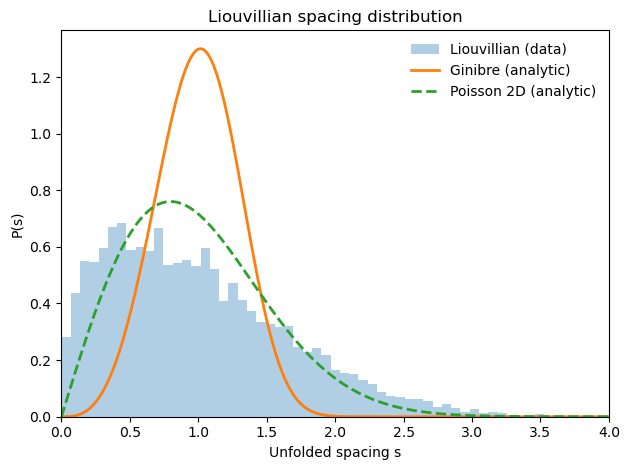

In [12]:
# Plot spacing distribution vs Ginibre and 2D Poisson
using PyPlot

# histogram of unfolded spacings
bins = range(0, 4; length=60)
hist_counts, bin_edges = hist(s_unf; bins=bins, density=true, alpha=0.35, label="Liouvillian (data)")

# analytic curves
plot(s, p_GIN; lw=2.0, label="Ginibre (analytic)")
plot(s, p_P2D; lw=2.0, ls="--", label="Poisson 2D (analytic)")

xlim(0,4)
xlabel("Unfolded spacing s")
ylabel("P(s)")
title("Liouvillian spacing distribution")
legend(frameon=false)
tight_layout()


### Need to increase Fock basis and test Convergency